<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/An%C3%A1lise_de_vendas_Moka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - BIUD




Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [ ]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = '/content/Moka - Todas as vendas.csv'

In [ ]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,date,customer_id,total_value,nfe,business_id
0,89861303,2024-05-01 21:35:31.000,NaN,136.1,wc_order_PT9GajHSxisoX,4448
1,89840700,2024-05-01 19:54:20.000,9823829.0,44.2,41240516828505000936650010000104241501701254,4328
2,89840702,2024-05-01 19:52:03.000,9576223.0,52.0,41240516828505000936650010000104231769881807,4328
3,89840660,2024-05-01 19:15:31.000,10471358.0,22.0,41240516828505000936650010000104201992993200,4328
4,89861318,2024-05-01 18:25:39.000,NaN,166.0,wc_order_ezsIM9L5LzJFa,4448
5,89840661,2024-05-01 18:06:44.000,9561579.0,149.6,41240516828505000936650010000104191342652041,4328
6,89840662,2024-05-01 18:00:20.000,10471359.0,112.0,41240516828505000936650010000104181400401398,4328
7,89840664,2024-05-01 17:33:46.000,10471360.0,156.0,41240516828505000936650010000104171017187756,4328
8,89840658,2024-05-01 16:59:32.000,9562189.0,44.2,41240516828505000936650010000104161596268900,4328
9,89840699,2024-05-01 16:55:46.000,9561840.0,336.0,41240516828505000936650010000104151910499428,4328


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(61762, 6)

In [ ]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61762 entries, 0 to 61761
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61762 non-null  int64  
 1   date         61762 non-null  object 
 2   customer_id  36160 non-null  float64
 3   total_value  61762 non-null  float64
 4   nfe          61762 non-null  object 
 5   business_id  61762 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ MB


In [ ]:
# Verifica a distribuição de vendas unidade
dataset.groupby('business_id').size()

business_id
4327     6011
4328     9436
4329     9142
4330     4190
4448    32983
dtype: int64

In [ ]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,customer_id,total_value,business_id
count,6.176200e+04,3.616000e+04,61762.000000,61762.000000
mean,8.415703e+07,9.845343e+06,149.288511,4392.270441
std,2.345433e+06,1.751569e+05,137.383409,59.665505
min,8.149923e+07,9.557563e+06,0.000000,4327.000000
25%,8.152108e+07,9.885877e+06,88.000000,4328.000000
50%,8.501918e+07,9.887857e+06,112.000000,4448.000000
75%,8.503778e+07,9.891202e+06,175.200000,4448.000000
max,8.986132e+07,1.047139e+07,7800.000000,4448.000000


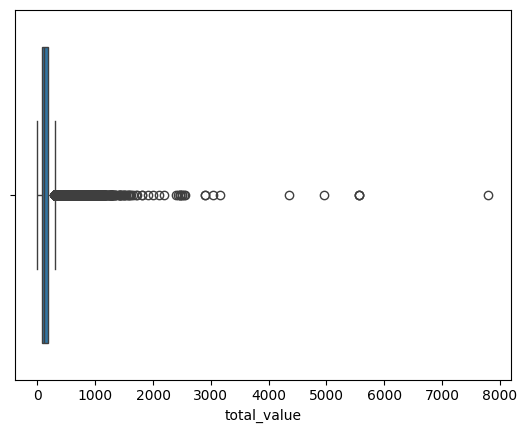

In [ ]:
# boxplot com seaborn de Total_valeu
sns.boxplot(x=dataset['total_value']);

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

id                 0
date               0
customer_id    25602
total_value        0
nfe                0
business_id        0
dtype: int64

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

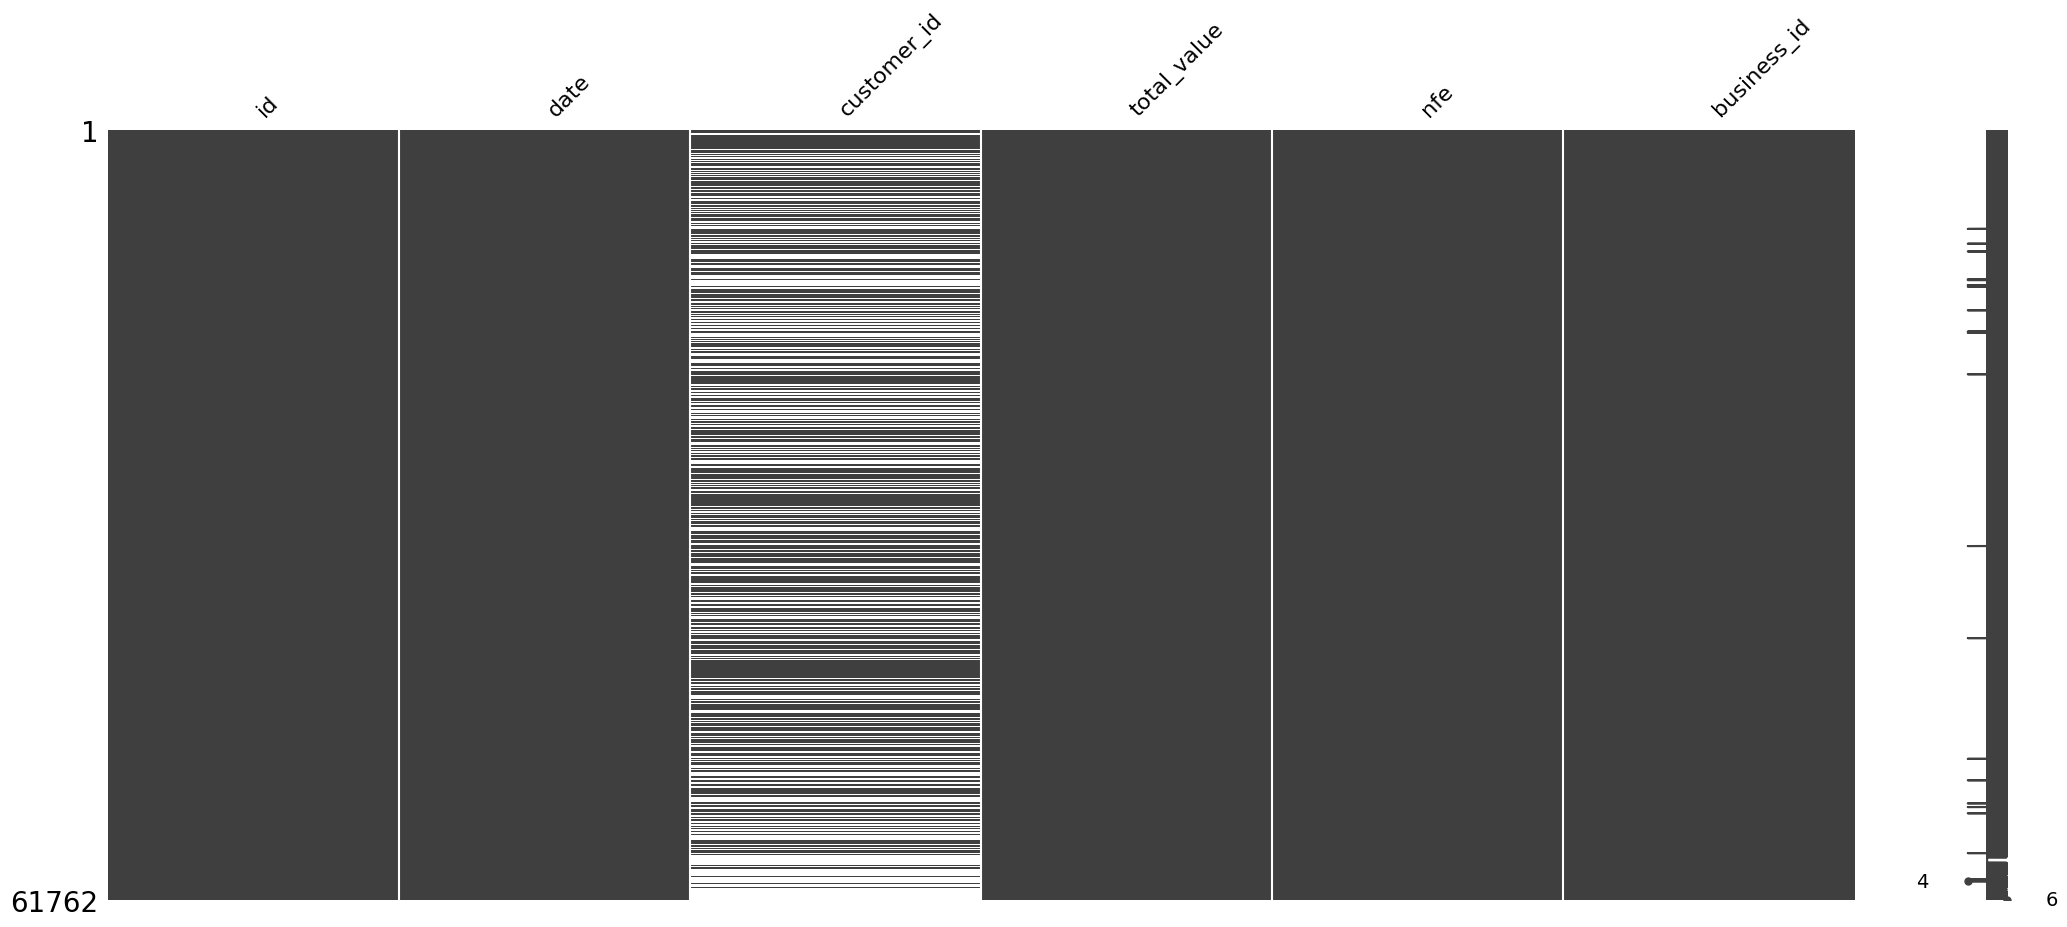

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [ ]:
# verificando nulls no dataset
crek.isnull().sum()

id                 0
date               0
customer_id    25602
total_value      143
nfe                0
business_id        0
dtype: int64

Com esse novo dataset, vamos verificar como se comportam as novas estatísticas descritvas.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
crek.describe()

,id,customer_id,total_value,business_id
count,6.176200e+04,3.616000e+04,61619.000000,61762.000000
mean,8.415703e+07,9.845343e+06,149.634967,4392.270441
std,2.345433e+06,1.751569e+05,137.354143,59.665505
min,8.149923e+07,9.557563e+06,0.040000,4327.000000
25%,8.152108e+07,9.885877e+06,88.000000,4328.000000
50%,8.501918e+07,9.887857e+06,112.000000,4448.000000
75%,8.503778e+07,9.891202e+06,175.570000,4448.000000
max,8.986132e+07,1.047139e+07,7800.000000,4448.000000


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

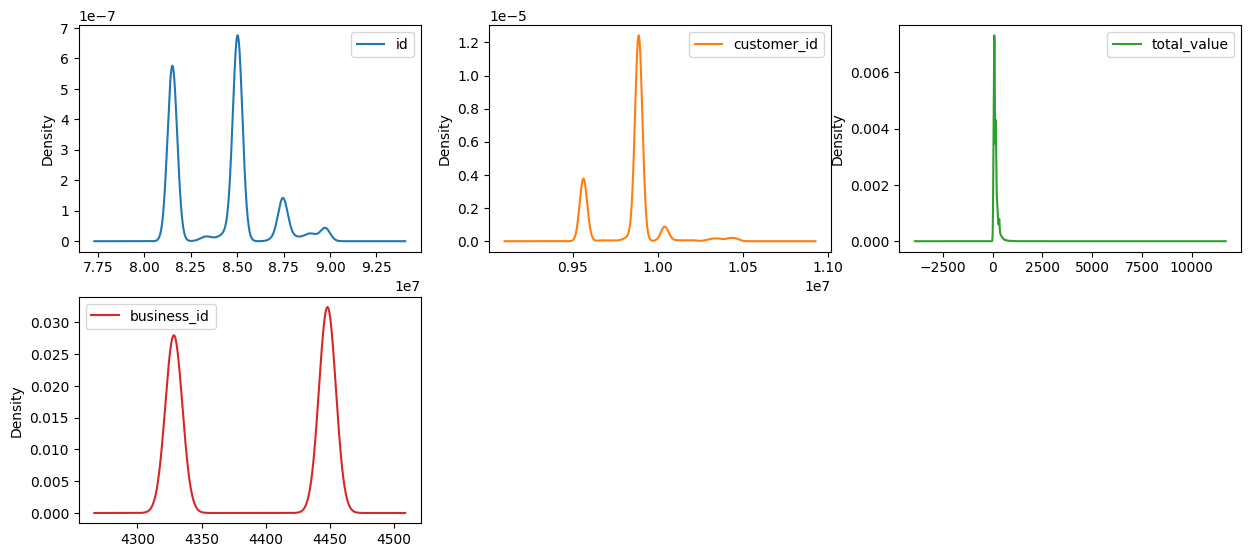

In [ ]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

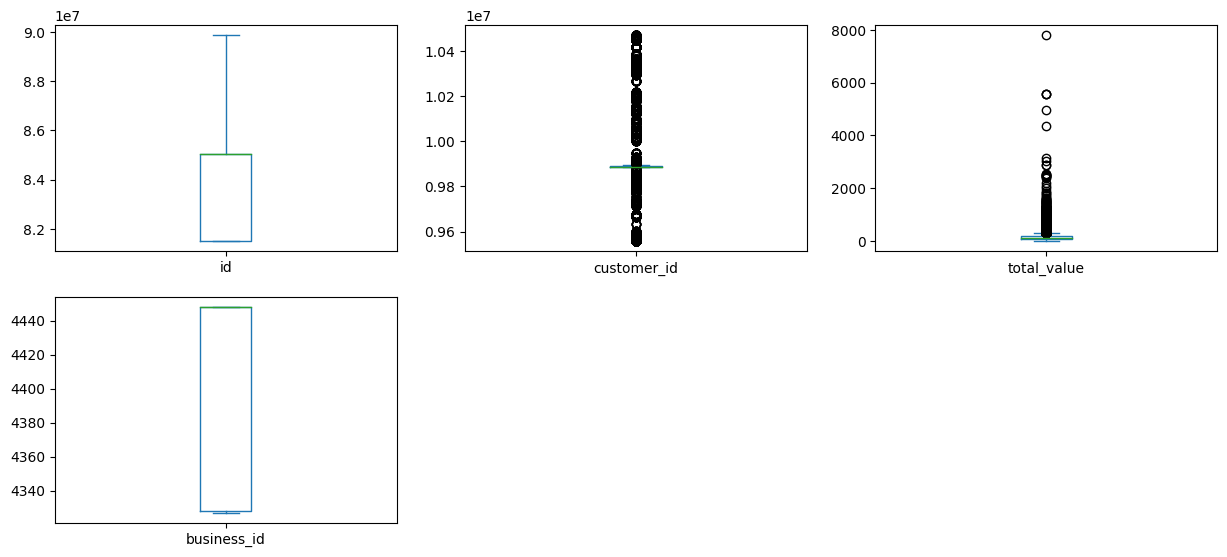

In [ ]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir do gráfico de desindade, temos uma outra visualização no problema de vendas negativas do dataset. Além disso, algumas vendas se destacam, mostrando que pode haver erros para cima também.


# Visualização histórica de dados

Nessa seção, o nosso objetivo é identificar se existe algum período em que a evolução do total_valeu (valor total nas vendas) tem algum período que se destaca.
Para isso, iremos usar a biblioteca do Seaborn.

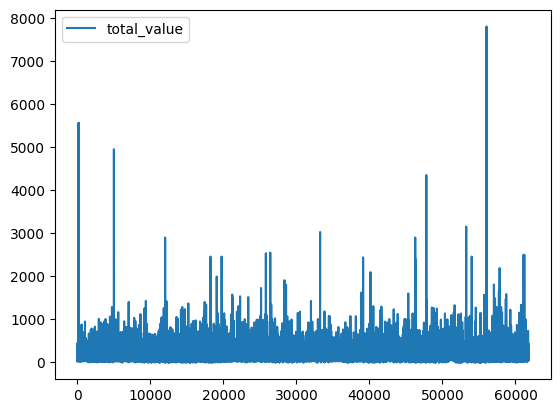

In [ ]:
# gráfico de linhas com Seaborn
sns.lineplot(data=dataset.drop(['id','customer_id','business_id'], axis=1));

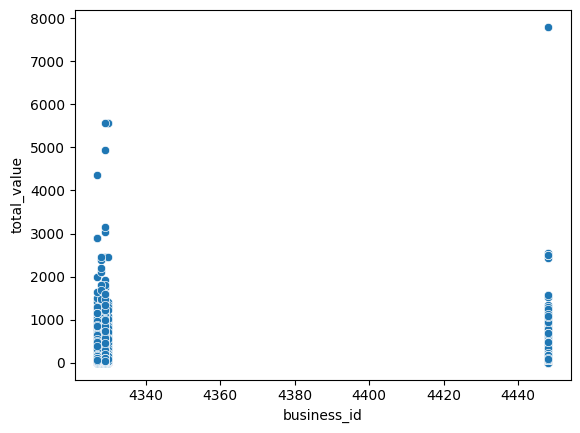

In [ ]:
# scatter plot com Seaborn
sns.scatterplot(x='business_id', y='total_value', data=dataset);